<a href="https://colab.research.google.com/github/seymatttass/MachineLearningExamples/blob/main/ML2_PLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
import pandas as pd
import numpy as np

hit = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [ ]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [ ]:
pls_model.coef_

array([[ 2.47335600e-01,  1.13030348e+00,  2.08295898e+00,
         1.58599864e+00,  1.20781837e+00,  1.91015780e+00,
         3.55673082e+00,  1.21724059e-02,  4.94616408e-02,
         2.58964530e-01,  9.96443520e-02,  9.25548551e-02,
         9.84366218e-02,  1.77753399e-01,  4.68377973e-02,
        -1.43965788e-01,  3.51398888e+01, -7.43195797e+01,
         2.93829559e+01]])

In [ ]:
#TAHMİN

pls_model.predict(X_train)[0:10]

array([344.91941493, 848.87070769, 692.93622642, 185.56577984,
       435.49196077, 987.49530026, 120.63097106, 289.9263406 ,
       663.41886918, 817.90486641])

In [ ]:
y_pred = pls_model.predict(X_train)

In [ ]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [ ]:
r2_score(y_train,y_pred)

0.5140424486535481

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

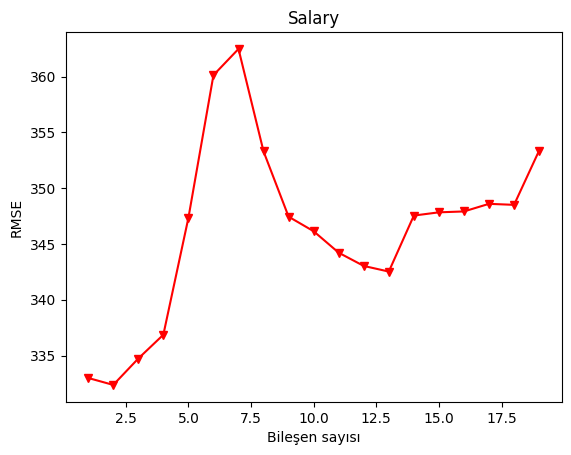

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.cross_decomposition import PLSRegression
import numpy as np
import matplotlib.pyplot as plt

# KFold nesnesi oluşturma
cv_10 = KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1 * cross_val_score(pls, X_train, y_train, cv=cv_10, scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

# RMSE sonuçlarını grafikte gösterme
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c='r')
plt.xlabel("Bileşen sayısı")
plt.ylabel("RMSE")
plt.title("Salary")
plt.show()


In [ ]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526